In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pyswarm import pso
from pyswarms.utils.plotters import plot_cost_history

In [2]:
df = pd.read_table('smsspamcollection/SMSSpamCollection', 
                   sep='\t', 
                   names=['label','sms_message'])

df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()
df['label'] = df.label.map({'ham':0, 'spam':1})
df.shape


(5572, 2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [5]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [6]:
names = count_vector.get_feature_names_out()
frequency_matrix = pd.DataFrame(data=testing_data.toarray(), columns=names)
frequency_matrix.head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [8]:
predictions = naive_bayes.predict(testing_data)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from pyswarms.single.global_best import GlobalBestPSO


data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.DataFrame(data.target, columns=["Target"])

def fitness_function(params):
    alpha = params[0]
    nb = MultinomialNB(alpha=alpha)
    scores = cross_val_score(nb, X, Y.values.ravel(), cv=5)
    return np.mean(scores)

bounds = (np.array([0, 0, 0, 0]), 
          np.array([1,1,1,1]))

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

optimizer = GlobalBestPSO(n_particles=10, dimensions=4, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(fitness_function, iters=10)
print("Mejores parámetros encontrados: ", best_params)


2023-04-24 13:00:33,914 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.953
2023-04-24 13:00:34,124 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.9533333333333334, best pos: [0.74175453 0.5259188  0.76931209 0.03758594]


Mejores parámetros encontrados:  [0.74175453 0.5259188  0.76931209 0.03758594]


In [10]:
a = Y.values.ravel()

In [13]:
names = count_vector.get_feature_names_out()
X = pd.DataFrame(data=training_data.toarray(), columns=names)
Y = pd.DataFrame(y_train)

def fitness_function(params):
    alpha = params[0]
    nb = MultinomialNB(alpha=alpha)
    scores = cross_val_score(nb, X, Y.values.ravel(), cv=5)
    return -np.mean(scores)

bounds = (np.zeros(7456), 
          np.ones(7456))

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

optimizer = GlobalBestPSO(n_particles=100, dimensions=7456, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(fitness_function, iters=100)

2023-04-24 13:07:52,923 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.98
2023-04-24 13:12:22,027 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9796602011288428, best pos: [0.6170294  0.6487232  0.45000932 ... 0.57831537 0.02071885 0.38489014]


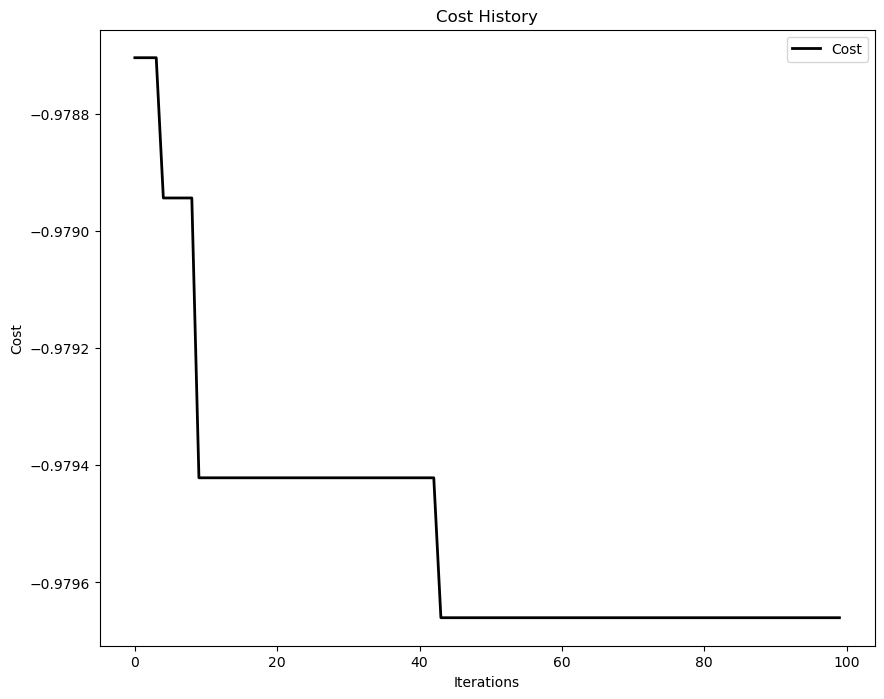

In [14]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()